In [49]:
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

warnings.filterwarnings('ignore')

In [11]:
data_set = pd.read_csv('./Mall_Customers.csv')
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
data_set.rename(index=str, columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace=True)
data_set.head()


,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


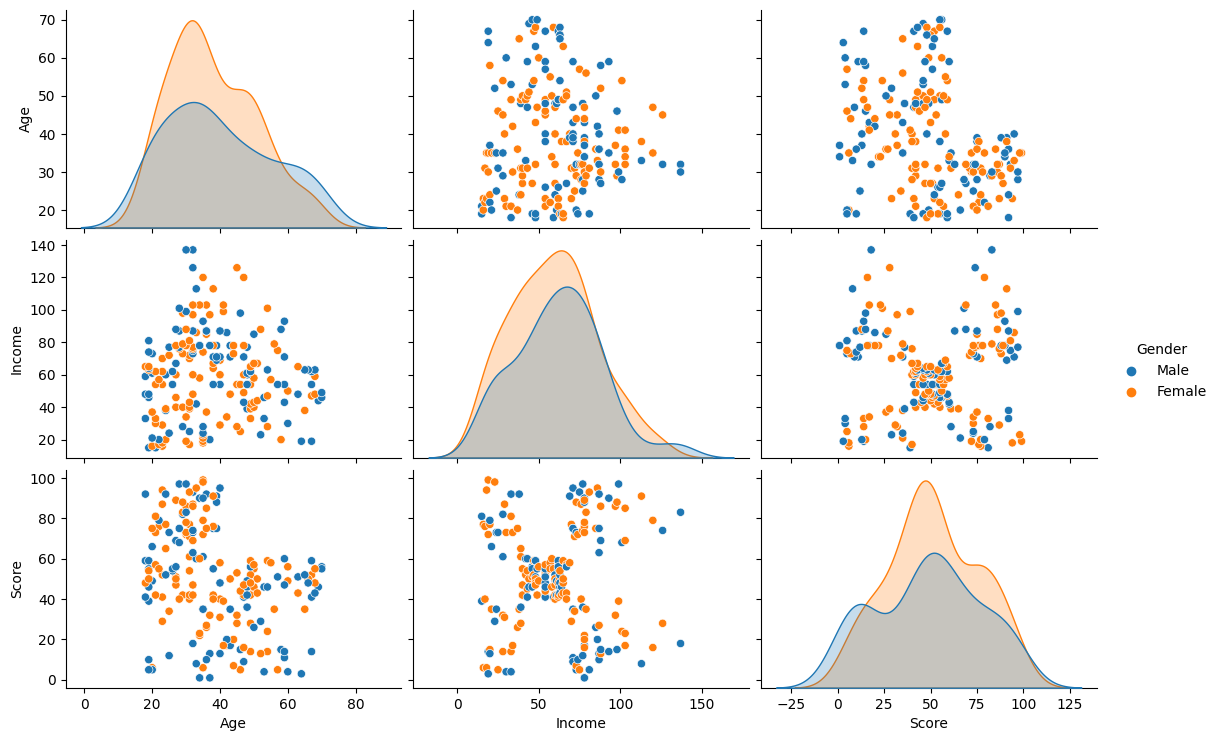

In [15]:

X = data_set.drop (['CustomerID', 'Gender'], axis=1)
sns.pairplot(data_set.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [18]:
# I need to practice HeatMap with sns

The Clustering Model

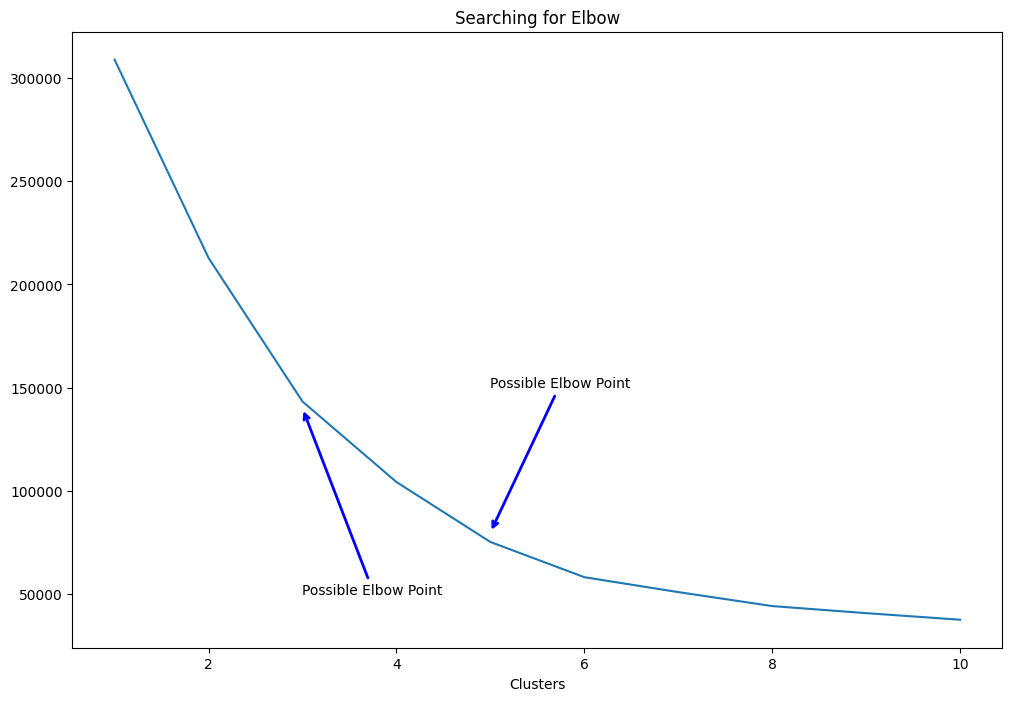

In [22]:

from sklearn.cluster import  KMeans 

clusters = []
# I am not sure about the range here

for i in range(1, 11):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data', arrowprops=dict(arrowstyle= '->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data', arrowprops=dict(arrowstyle= '->', connectionstyle='arc3', color='blue', lw=2))

plt.show()




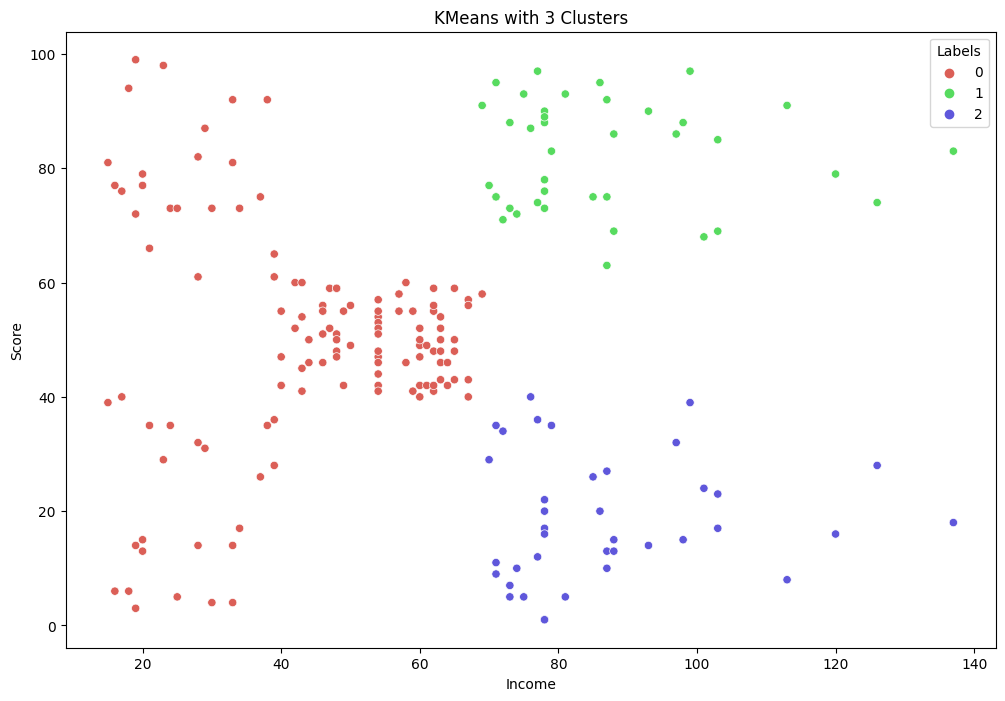

In [29]:

# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = X['Income'], y = X['Score'],hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

## Now we try this is with 5 clusters

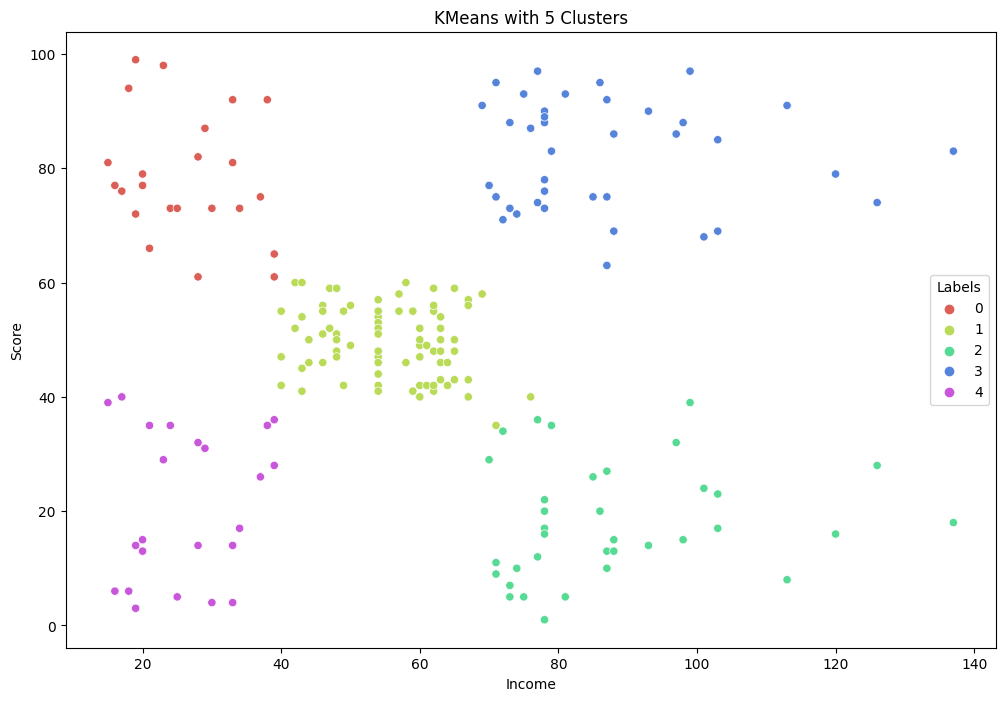

In [30]:

km_5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km_5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = X['Income'], y = X['Score'],hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()


## Hierarchical Clustering

In [31]:

from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

# Thisa matrix representing the distance
dist = distance_matrix(X, X)
print(dist)

[[  0.          42.23742416  33.03028913 ... 117.11532778 124.49096353
  130.16143822]
 [ 42.23742416   0.          75.11990415 ... 111.80339887 137.76066202
  122.38463956]
 [ 33.03028913  75.11990415   0.         ... 129.8807145  122.20065466
  143.77412841]
 ...
 [117.11532778 111.80339887 129.8807145  ...   0.          57.07889277
   14.35270009]
 [124.49096353 137.76066202 122.20065466 ...  57.07889277   0.
   65.03845017]
 [130.16143822 122.38463956 143.77412841 ...  14.35270009  65.03845017
    0.        ]]


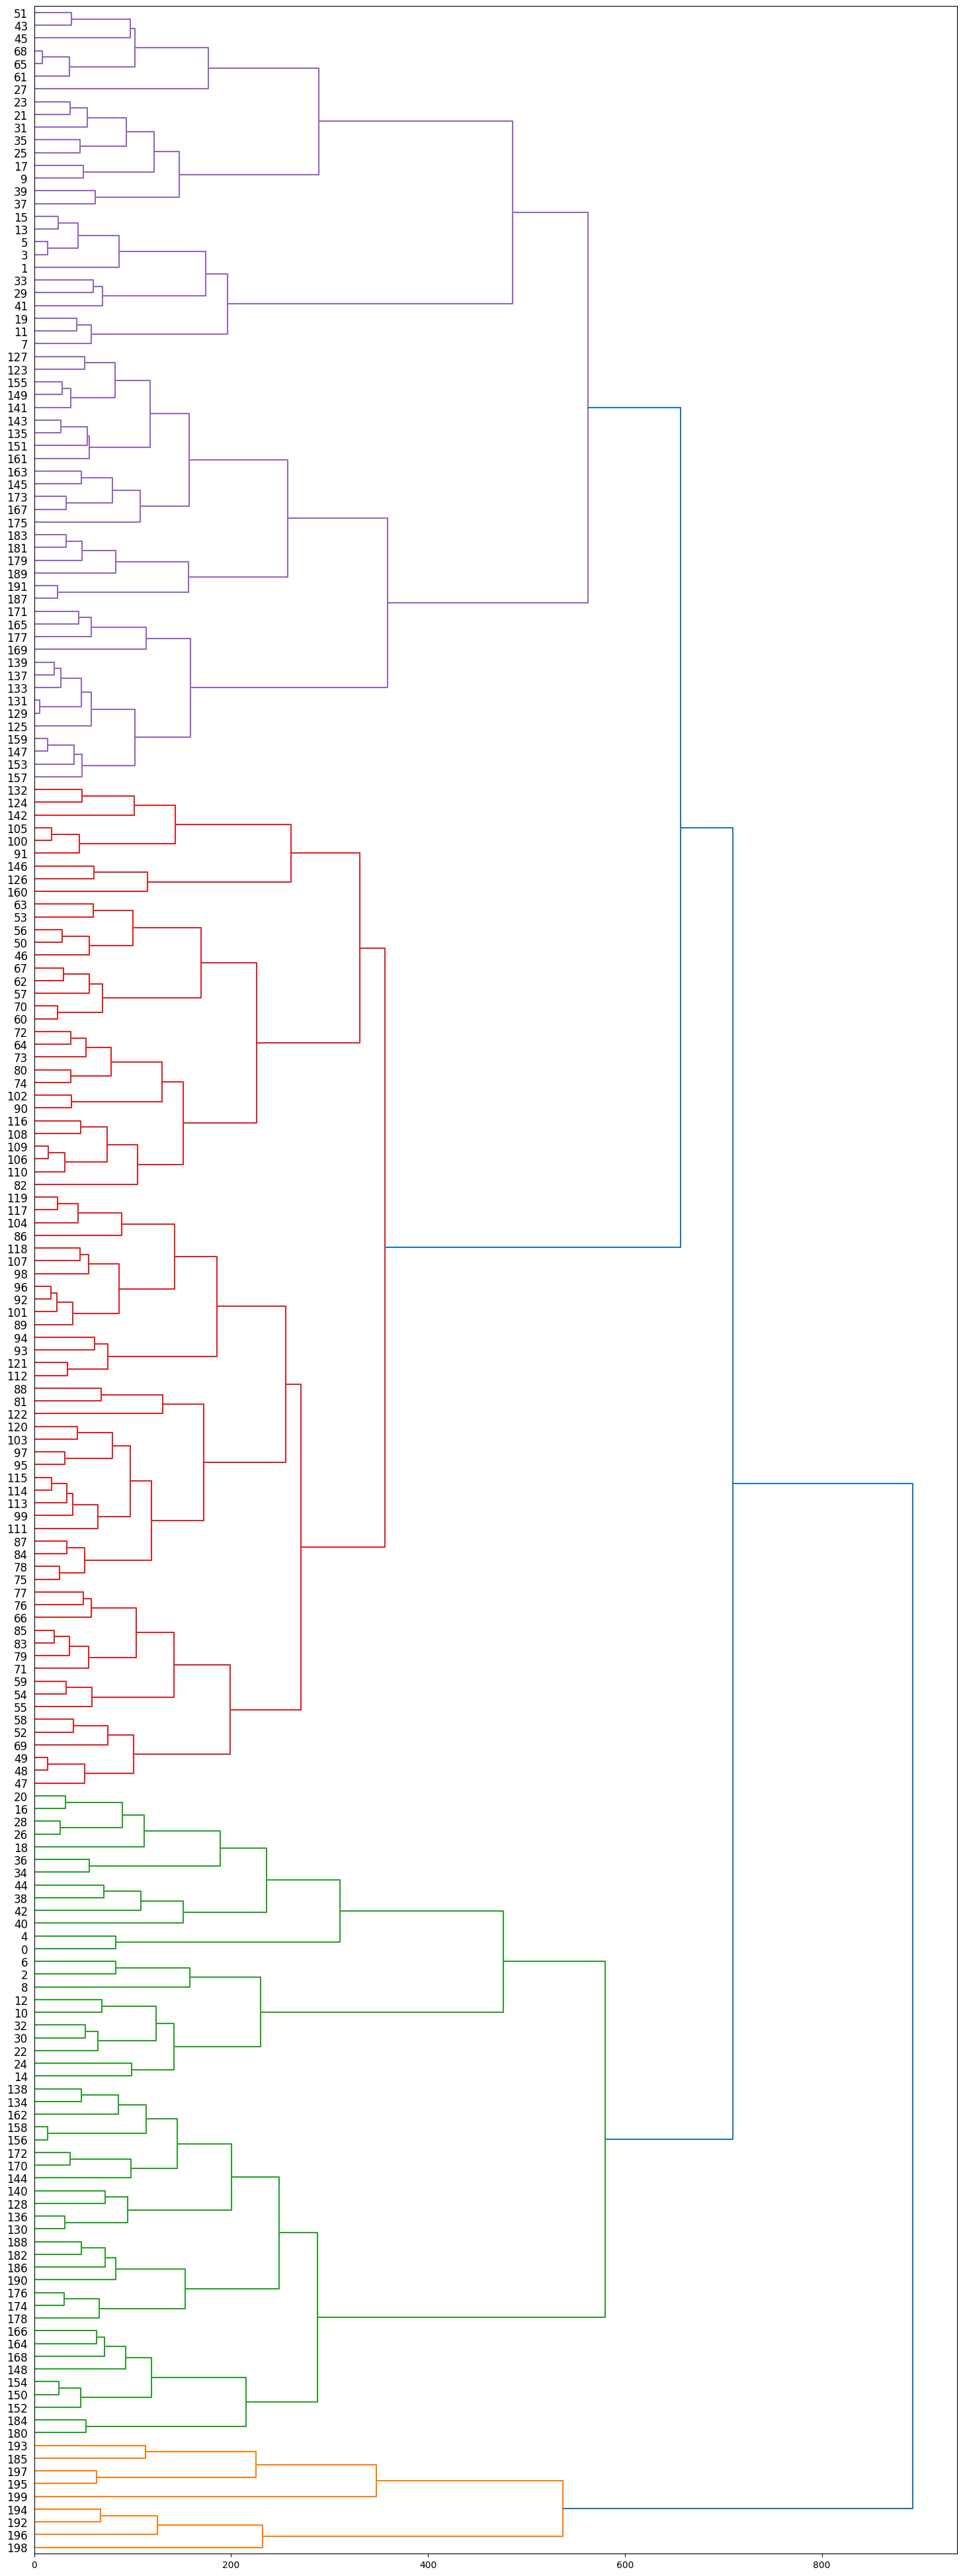

In [34]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

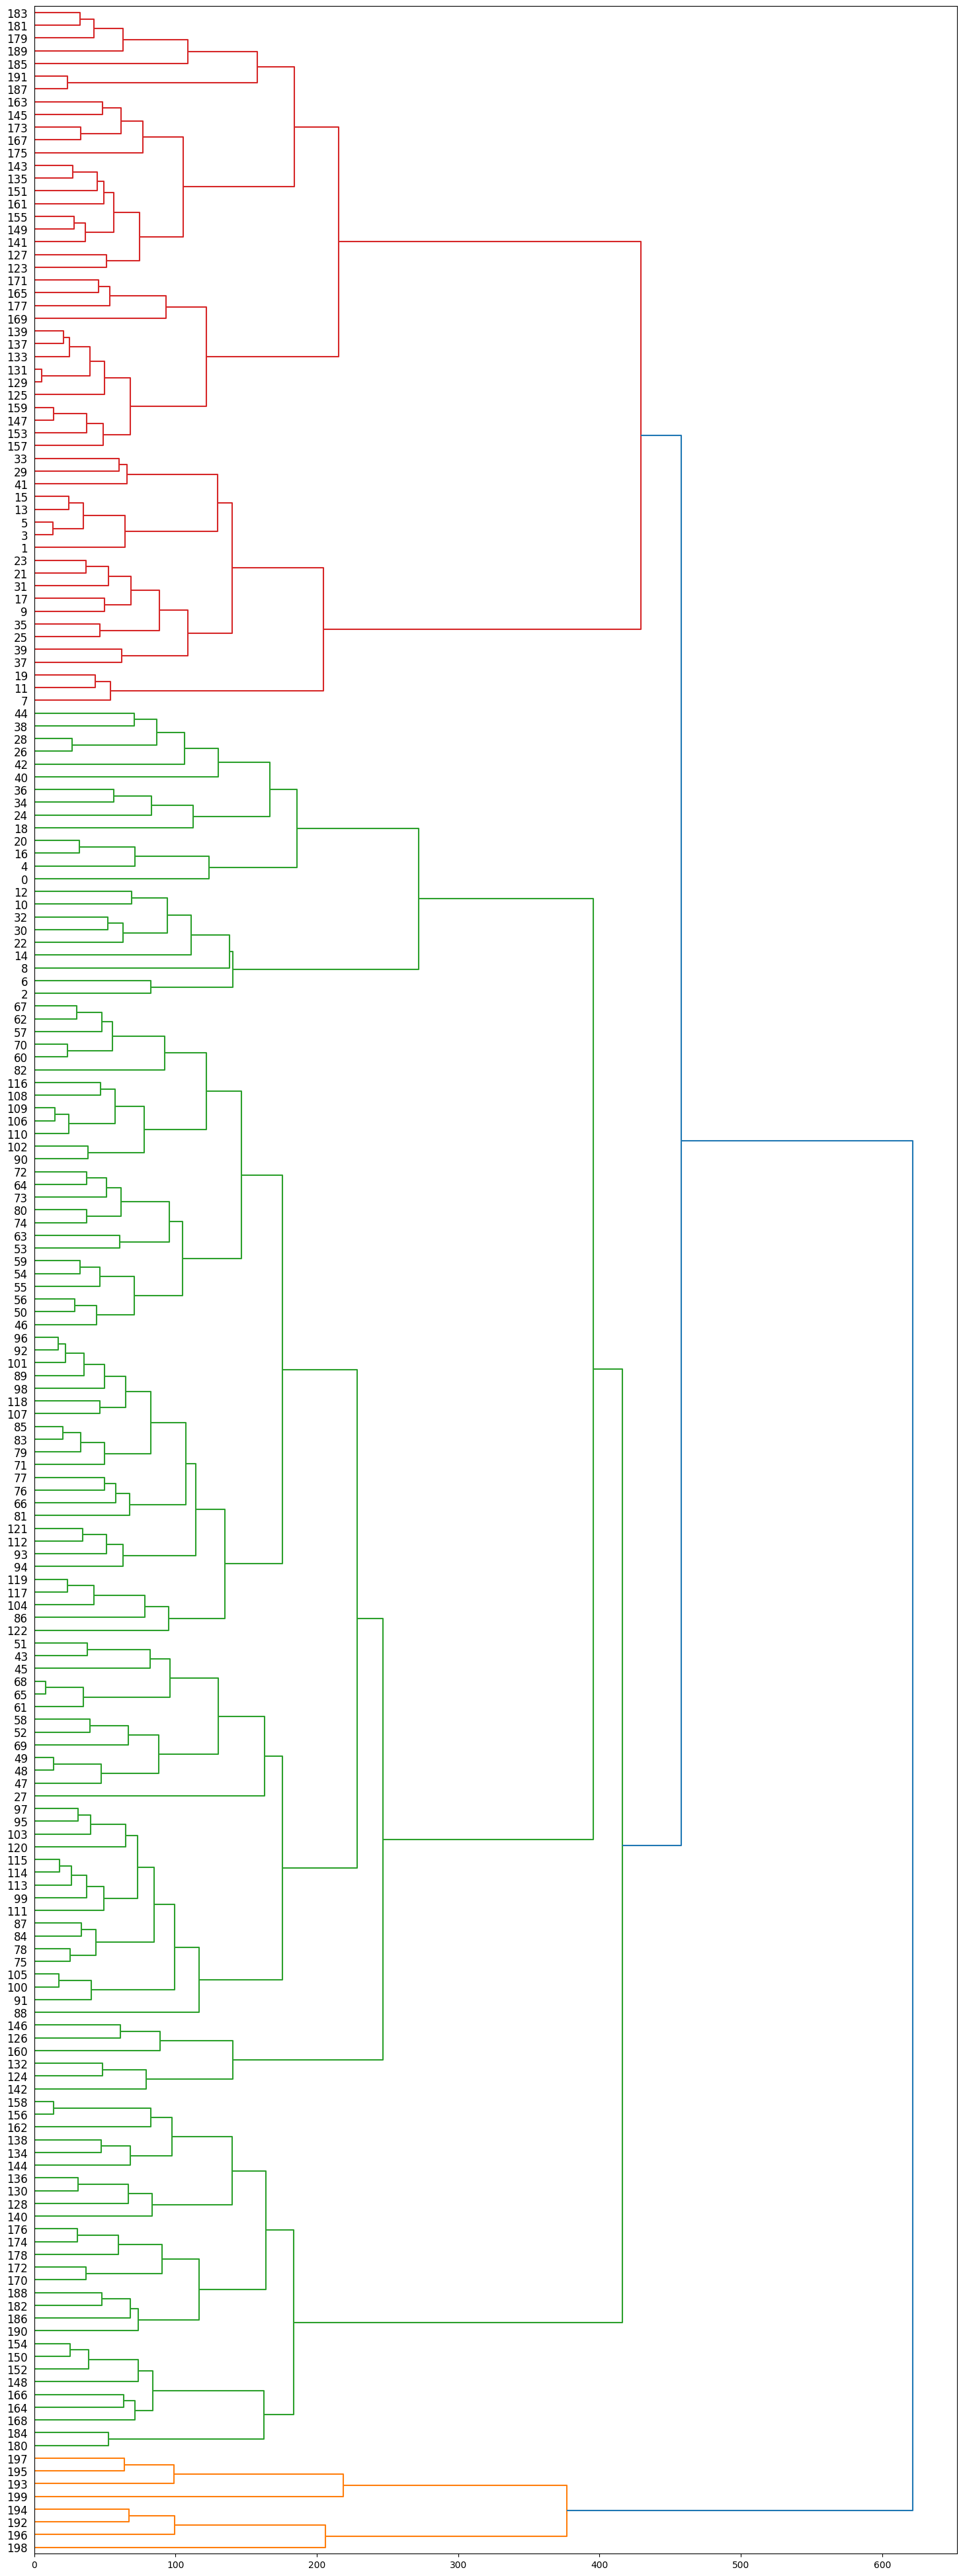

In [36]:
# This is for the average linkage
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

## Density Based Clustering (DBSCAN)

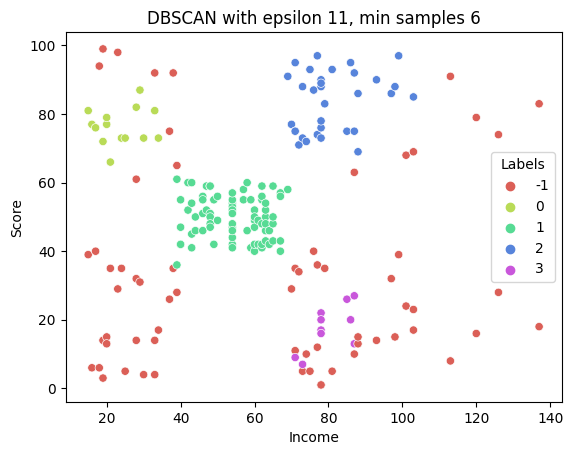

In [39]:

from sklearn.cluster import  DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_ 

sns.scatterplot(x = X['Income'], y= X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

## clustering: Mean Shift Algorithm

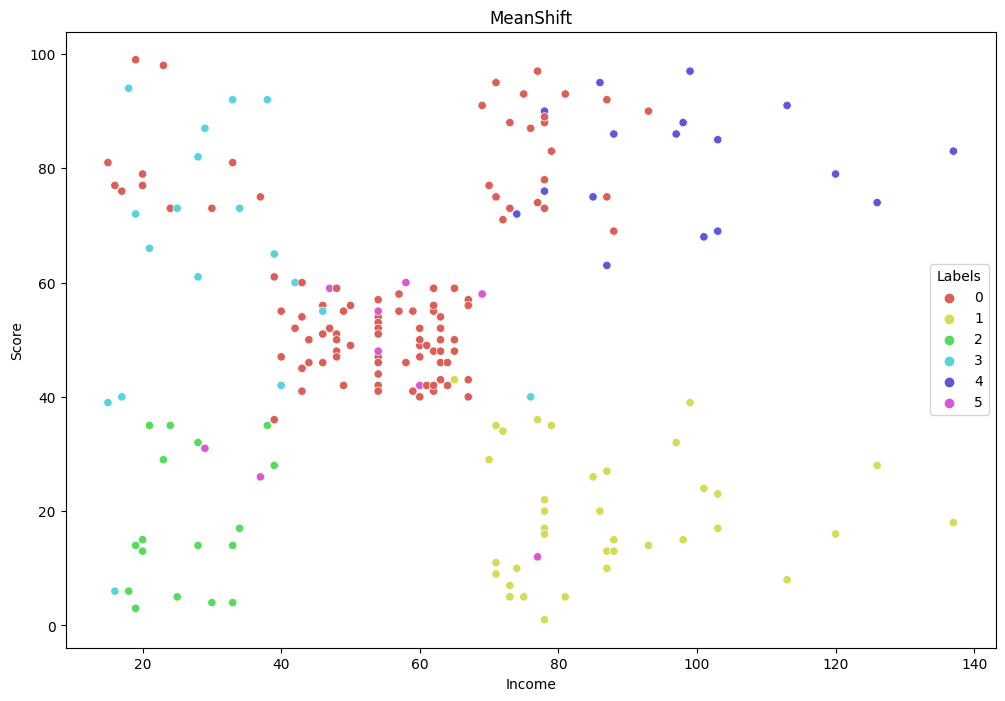

In [48]:

from sklearn.cluster import MeanShift, estimate_bandwidth

# we have bandwidth for Meanshift clustering as argument


bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize= (12, 8))
sns.scatterplot( x= X['Income'], y= X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))

plt.plot()
plt.title('MeanShift')
plt.show()

## Agglomerative Clustering

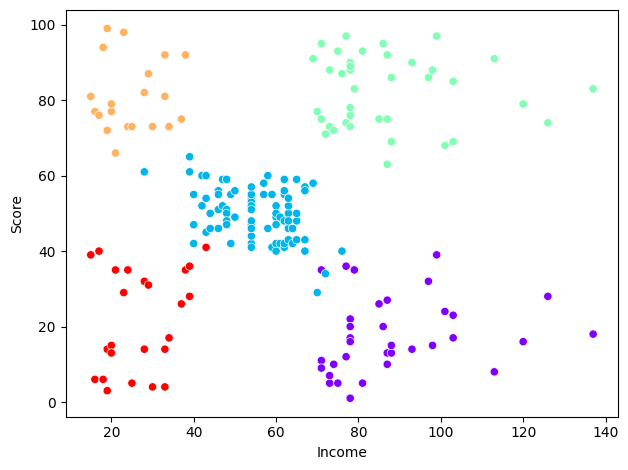

In [61]:


ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
sns.scatterplot(x= X['Income'], y= X['Score'], c = agglom.fit_predict(X), cmap ='rainbow' )
#sns.scatterplot( x= X['Income'], y= X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
ax.set_title('Agglomerative Clustering')


plt.plot()
plt.tight_layout()
plt.show()

Need to change the scatters shape and look!